# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

- **step** Maps a unit of time in the real world. In this case 1 step is 1 hour of time.

- **type:** CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER

- **amount:** :amount of the transaction in local currency

- **nameOrig:** customer who started the transaction

- **oldbalanceOrg:** initial balance before the transaction

- **newbalanceOrig:** customer's balance after the transaction.

- **nameDest:** recipient ID of the transaction.

- **oldbalanceDest:** initial recipient balance before the transaction.

- **newbalanceDest:** recipient's balance after the transaction.

- **isFraud:** identifies a fraudulent transaction (1) and non fraudulent (0)

- **isFlaggedFraud:** flags illegal attempts to transfer more than 200.000 in a single transaction.

In [2]:
# Your code here
data = pd.read_csv('/Users/abreualberto91/IRONHACK/Datasets/PS_20174392719_1491204439457_log 2.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### What is the distribution of the outcome? 

In [3]:
# Your response here
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

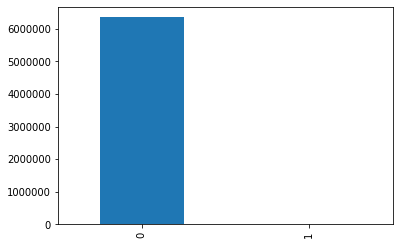

In [4]:
data['isFraud'].value_counts().plot(kind='bar')

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [5]:
# Your code here
data['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
data[['step']].head()

,step
0,1
1,1
2,1
3,1
4,1


##### Separating the data in target and data

In [11]:
y = data[['isFraud']]

In [12]:
X = data.iloc[:,:-2]

#### Changing the column type into dummy variables

In [13]:
X_dummies = pd.get_dummies(X, columns = ['type'], drop_first=True)

In [14]:
X_dummies.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [15]:
#Removing the step and the object type columns
X_dummies_log = X_dummies.iloc[:,[1,3,4,6,7,8,9,10,11]]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies_log, y, test_size=0.25, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')

log_model.fit(X_train, y_train)

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = log_model.predict(X_test)

In [19]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred, average="binary", pos_label= 1))
print ('Recall:', recall_score(y_test, y_pred, average="binary", pos_label= 1))
print ('Precision:', precision_score(y_test, y_pred, average="binary", pos_label= 1))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9975802421015242
F1 score: 0.4594860272433647
Recall: 0.8
Precision: 0.322301024428684

 confussion matrix:
 [[1585170    3440]
 [    409    1636]]


### Now pick a model of your choice and evaluate its accuracy.

In [8]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
data_sliced = data.iloc[0:20000,:]

In [17]:
data_sliced.isFraud.value_counts()

0    19919
1       81
Name: isFraud, dtype: int64

In [28]:
y_sliced = data_sliced['isFraud']

#### K nearest neighbors

In [18]:
data_knn = data_sliced.iloc[:,[2,4,5,7,8]]

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_knn)
data_scale = scaler.transform(data_knn)
data_scale = pd.DataFrame(data_scale)

In [20]:
data_scale.columns = data.iloc[:,[2,4,5,7,8]].columns

In [21]:
data_scale.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.391364,-0.286861,-0.293213,-0.328837,-0.373138
1,-0.418243,-0.354129,-0.355699,-0.328837,-0.373138
2,-0.423917,-0.363648,-0.364295,-0.328837,-0.373138
3,-0.423917,-0.363648,-0.364295,-0.320300,-0.373138
4,-0.385201,-0.344955,-0.351042,-0.328837,-0.373138


In [22]:
data_scale.shape

(20000, 5)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(data_scale, y_sliced, test_size=0.25, random_state=42)

In [30]:
knn.fit(X_train_scale, y_train_scale) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
knn.score(X_test_scale, y_test_scale)

0.9944

In [32]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

### Which model worked better and how do you know?

In [2]:
# Your response here

# The logistic model and the knn model scores were very optimal in both models, achiving accuracy scores of .99 
# in both cases. I will say that this model perform very well on the test data. 